In [1]:
from vega_datasets import data

import acquire as a
import prepare as prep

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm


In [2]:
df = prep.prep_sales()

In [3]:
df.to_csv('prepped_sales.csv')

In [4]:
df = pd.read_csv('prepped_sales.csv')

In [4]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')
plt.rc('font', size=16)

In [7]:
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

Date Range: 0 to 912999
Shape: (913000, 18)


In [8]:
df.index

DatetimeIndex(['2013-01-01 00:00:00+00:00', '2013-01-02 00:00:00+00:00',
               '2013-01-03 00:00:00+00:00', '2013-01-04 00:00:00+00:00',
               '2013-01-05 00:00:00+00:00', '2013-01-06 00:00:00+00:00',
               '2013-01-07 00:00:00+00:00', '2013-01-08 00:00:00+00:00',
               '2013-01-09 00:00:00+00:00', '2013-01-10 00:00:00+00:00',
               ...
               '2017-12-22 00:00:00+00:00', '2017-12-23 00:00:00+00:00',
               '2017-12-24 00:00:00+00:00', '2017-12-25 00:00:00+00:00',
               '2017-12-26 00:00:00+00:00', '2017-12-27 00:00:00+00:00',
               '2017-12-28 00:00:00+00:00', '2017-12-29 00:00:00+00:00',
               '2017-12-30 00:00:00+00:00', '2017-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='sale_date', length=913000, freq=None)

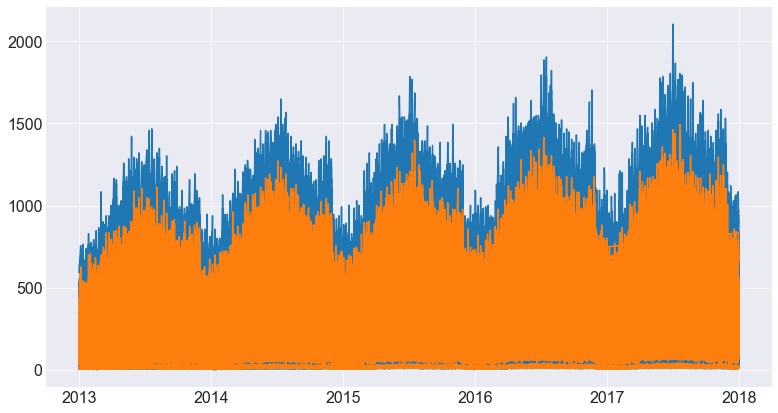

In [10]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

<AxesSubplot:xlabel='sale_date'>

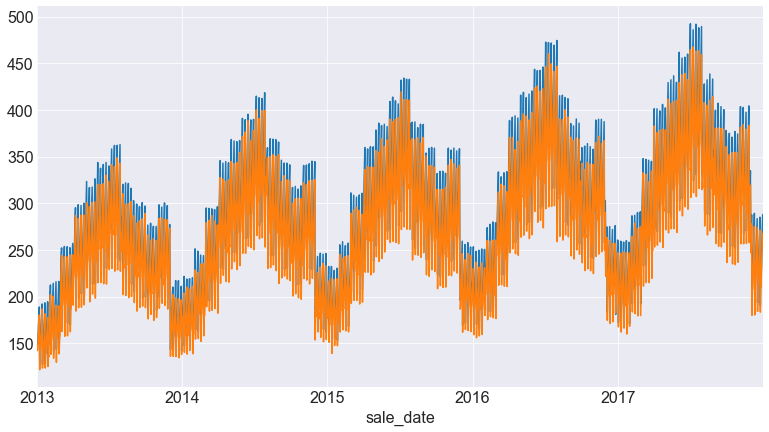

In [11]:
train.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot()

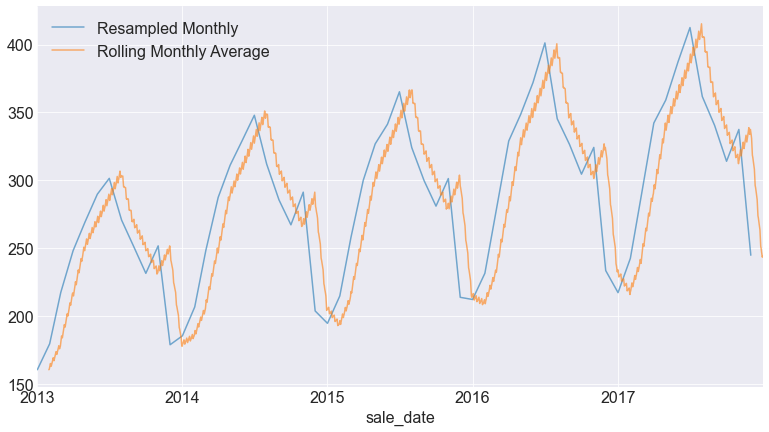

In [21]:
y = train.resample('D').sales_total.mean()

y.resample('M').mean().plot(label='Resampled Monthly', alpha=.6)
y.rolling(30).mean().plot(label='Rolling Monthly Average', alpha=.6)
plt.legend()

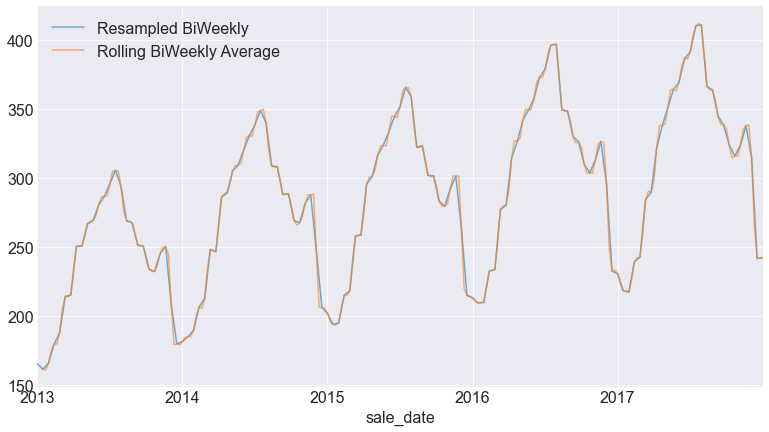

In [22]:
y = train.resample('D').sales_total.mean()

y.resample('2W').mean().plot(label='Resampled BiWeekly', alpha=.6)
y.rolling(14).mean().plot(label='Rolling BiWeekly Average', alpha=.6)
plt.legend()

In [24]:
df = prep.prep_germany(cached=True)

In [25]:
df.head()

,date,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,,
2006-01-01,2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,2006-01-05,1477.131,0.0,0.0,0.0,1,2006


In [26]:
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

Date Range: 2006-01-01 00:00:00 to 2017-12-31 00:00:00
Shape: (4383, 7)


In [38]:
df['fossil_fuels'] = df.consumption - df.wind_and_solar

In [39]:
train = df[:'2016']
test = df['2017']

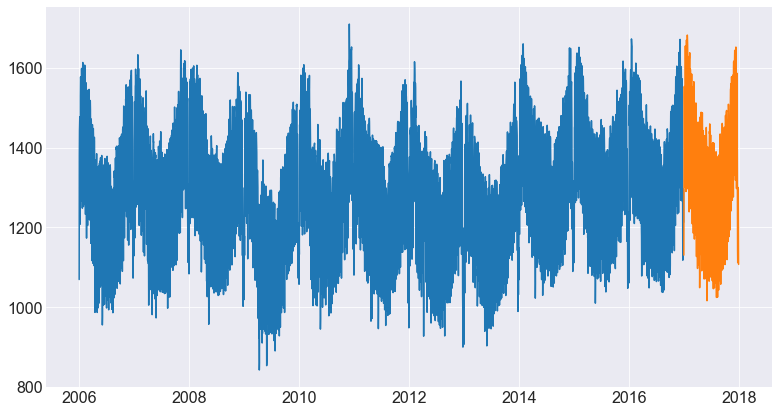

In [40]:

plt.plot(train.index, train.consumption)
plt.plot(test.index, test.consumption)

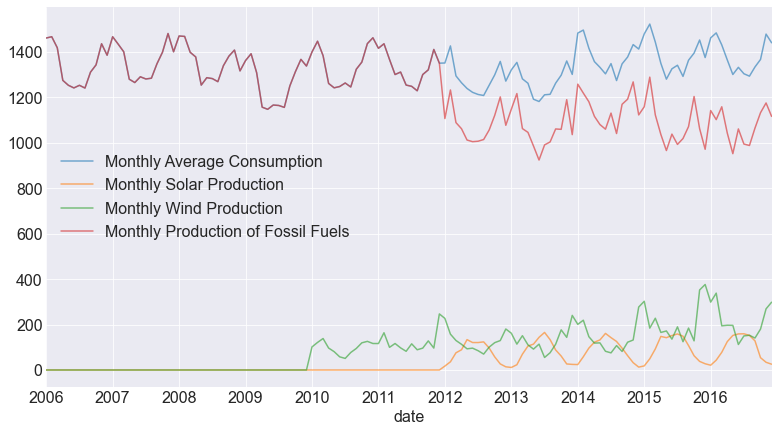

In [56]:
train.resample('m').consumption.mean().plot(alpha=.6, label='Monthly Average Consumption')
train.resample('m').solar.mean().plot(alpha=.6, label='Monthly Solar Production')
train.resample('m').wind.mean().plot(alpha=.6, label='Monthly Wind Production')
train.resample('m').fossil_fuels.mean().plot(alpha=.6, label='Monthly Production of Fossil Fuels')


plt.legend()
plt.show()

In [59]:
y_solar = train.solar.resample('W').mean()
y_wind = train.wind.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
date,,,,
2006-01-01,0.0,NaN,-31.489949,NaN
2006-01-08,0.0,NaN,-29.068403,NaN
2006-01-15,0.0,NaN,-30.702312,NaN
2006-01-22,0.0,NaN,-28.889866,NaN
2006-01-29,0.0,NaN,-30.789656,NaN


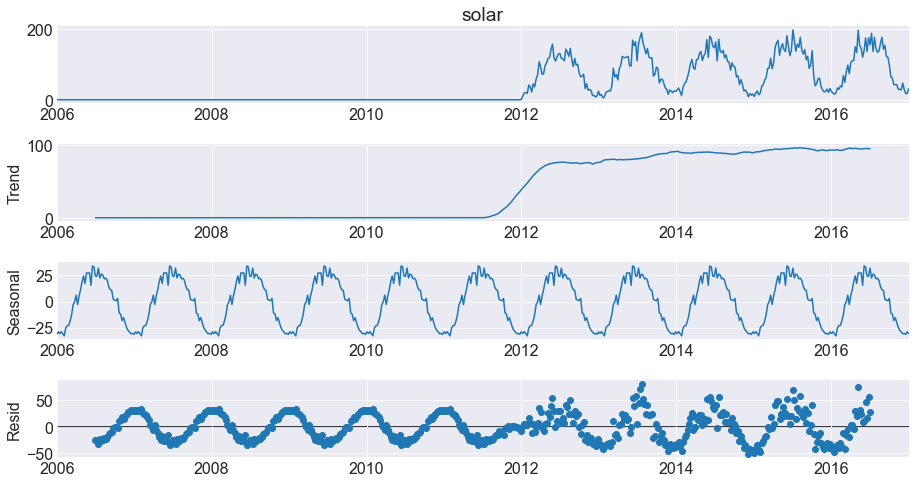

In [60]:
sm.tsa.seasonal_decompose(y_solar.resample('w').mean()).plot()
None

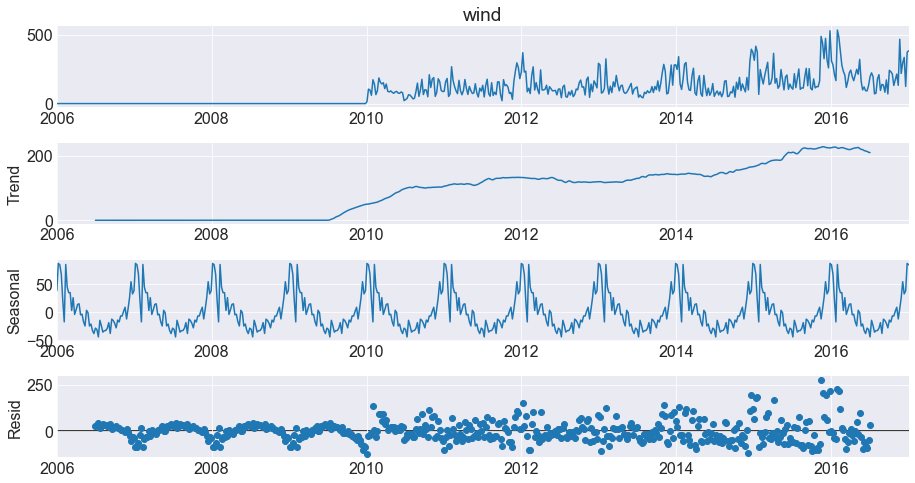

In [61]:
sm.tsa.seasonal_decompose(y_wind.resample('w').mean()).plot()
None